Agent episode lengths

So for: | ep_len_mean      | 3.6e+03  |  ← 3600 steps/episode


Expert → 150k / 3000 = ~50 episodes

Intermediate → 150k / 2000 = ~75 episodes

Beginner → 150k / 500 = ~300 episodes

You can estimate once and set fixed values for reproducibility.

# Generate Datasets

In [2]:
import torch
from tqdm import tqdm
import numpy as np
from stable_baselines3 import DQN
import warnings
import pandas as pd
import gc  # Import garbage collector module

warnings.filterwarnings("ignore")

In [3]:
SEED = 12345
ENV_ID = 'SeaquestNoFrameskip-v4'
NUM_TRANSITIONS = 150_000

In [4]:
# ensure the module is re-imported after changes
import importlib

import datasets.dataset_utils
importlib.reload(datasets.dataset_utils)

from datasets.dataset_utils import set_all_seeds, create_environment, analyze_action_distribution, generate_dataset, validate_dataset, evaluate_dqn_agent

In [5]:
# set seed for reproducability
set_all_seeds(SEED)

# force PyTorch to use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


In [6]:
# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

# AGENTs

In [6]:
# Define the DQN hyperparameters
dqn_params = {
    'learning_rate': 1e-4,
    'buffer_size': 100_000,              # ✅ much better for Seaquest
    'learning_starts': 50_000,           # ✅ reduced to match new buffer size
    'batch_size': 32,
    'train_freq': 4,
    'gradient_steps': 1,
    'target_update_interval': 1000,
    'exploration_fraction': 0.1,
    'exploration_initial_eps': 1.0,
    'exploration_final_eps': 0.01,
    'device': device,
    'seed': SEED,
    'verbose': 1,
}

In [9]:
%%time

# Initialize the DQN agent
dqn_agent = DQN('CnnPolicy', env, **dqn_params)

# Train the agent
dqn_agent.learn(total_timesteps=1_000_000)

# Save the trained model
dqn_agent.save("dqn_seaquest_beginner_agent(1mio)")

# print execution time it took to train the model
print("----- Execution time: Beginner Agent (DQN) | 1.000.000 Timesteps -----")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.76e+03 |
|    ep_rew_mean      | 90       |
|    exploration_rate | 0.891    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3121     |
|    time_elapsed     | 3        |
|    total_timesteps  | 11045    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.91e+03 |
|    ep_rew_mean      | 95       |
|    exploration_rate | 0.769    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3632     |
|    time_elapsed     | 6        |
|    total_timesteps  | 23297    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 

In [6]:
print(DQN.load("dqn_seaquest_beginner_agent(1Mio)", device="cpu").num_timesteps)  # How far was this model trained?

# Evaluate the trained DQN agent
average_reward, action_counts = evaluate_dqn_agent(env, DQN.load("dqn_seaquest_beginner_agent(1Mio)", device=device, env=env))

1000000
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


100%|██████████| 5/5 [00:37<00:00,  7.57s/it]

Average Reward over 5 episodes: 480.0
Action Counts: {2: 2372, 10: 5185, 8: 4220, 17: 3730, 5: 3630, 12: 3080, 16: 1170, 0: 860, 11: 540, 14: 2610, 9: 15, 7: 105, 4: 40, 3: 1015, 15: 195}


In [7]:
%%time

# Initialize the DQN agent
dqn_agent = DQN('CnnPolicy', env, **dqn_params)

# Train the agent
dqn_agent.learn(total_timesteps=5_000_000)

# Save the trained model
dqn_agent.save("dqn_seaquest_intermediate_agent(5mio)")

# print execution time it took to train the model
print("----- Execution time: Intermediate Agent (DQN) | 5.000.000 Timesteps -----")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.76e+03 |
|    ep_rew_mean      | 90       |
|    exploration_rate | 0.978    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3132     |
|    time_elapsed     | 3        |
|    total_timesteps  | 11045    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.91e+03 |
|    ep_rew_mean      | 95       |
|    exploration_rate | 0.954    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3633     |
|    time_elapsed     | 6        |
|    total_timesteps  | 23297    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 

In [7]:
print(DQN.load("dqn_seaquest_intermediate_agent(5Mio)", device="cpu").num_timesteps)  # How far was this model trained?

# Evaluate the trained DQN agent
average_reward, action_counts = evaluate_dqn_agent(env, DQN.load("dqn_seaquest_intermediate_agent(5Mio)", device=device, env=env))

5000000
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


100%|██████████| 5/5 [00:39<00:00,  7.80s/it]

Average Reward over 5 episodes: 940.0
Action Counts: {13: 2992, 15: 1855, 6: 3040, 9: 1450, 3: 4145, 8: 1105, 12: 5295, 2: 1955, 10: 485, 17: 1490, 5: 715, 16: 1435, 14: 1195, 11: 165, 7: 230, 1: 205, 4: 20, 0: 90}


In [7]:
%%time

# Initialize the DQN agent
dqn_agent = DQN('CnnPolicy', env, **dqn_params)

# Train the agent
dqn_agent.learn(total_timesteps=10_000_000)

# Save the trained model
dqn_agent.save("dqn_seaquest_expert_agent(10mio)")

# print execution time it took to train the model
print("----- Execution time: Expert Agent (DQN) | 10.000.000 Timesteps -----")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.76e+03 |
|    ep_rew_mean      | 90       |
|    exploration_rate | 0.989    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3136     |
|    time_elapsed     | 3        |
|    total_timesteps  | 11045    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.91e+03 |
|    ep_rew_mean      | 95       |
|    exploration_rate | 0.977    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3624     |
|    time_elapsed     | 6        |
|    total_timesteps  | 23297    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 

In [8]:
print(DQN.load("dqn_seaquest_expert_agent(10Mio)", device="cpu").num_timesteps)  # How far was this model trained?

# Evaluate the trained DQN agent
average_reward, action_counts = evaluate_dqn_agent(env, DQN.load("dqn_seaquest_expert_agent(10Mio)", device=device, env=env))

10000000
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


100%|██████████| 5/5 [00:47<00:00,  9.59s/it]

Average Reward over 5 episodes: 1500.0
Action Counts: {15: 6660, 10: 1470, 13: 9550, 12: 425, 9: 1605, 5: 1780, 0: 915, 3: 3505, 8: 2515, 17: 570, 6: 1685, 14: 1695, 7: 790, 16: 1335, 11: 260, 2: 320, 1: 1635, 4: 675}


## beginner dataset (1 Million Agent)

In [ ]:
# load the agent
beginner_agent = DQN.load("dqn_seaquest_beginner_agent(1Mio)", device=device, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


### 0%

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_beginner_perturb0.pkl'

In [ ]:
seaquest_beginner_perturb0 = generate_dataset(
    env=env,
    model=beginner_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=False,
    perturbation_level=0.0,
    save_path='datasets/beginner_logs',
    file_name=file_name,
    for_stats=False,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 155348
Number of perturbed actions: 0
Dataset saved to datasets/beginner_logs\seaquest_beginner_perturb0.pkl


Stats Dataset (with additional information)

In [ ]:
seaquest_beginner_perturb0_stats = generate_dataset(
    env=env,
    model=beginner_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=False,
    perturbation_level=0.0,
    save_path='datasets/beginner_logs',
    file_name=file_name,
    for_stats=True,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 155348
Number of perturbed actions: 0
Dataset saved to datasets/beginner_logs\seaquest_beginner_perturb0_stats.pkl


### 5%

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_beginner_perturb5.pkl'

In [ ]:
seaquest_beginner_perturb5 = generate_dataset(
    env=env,
    model=beginner_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.05,
    save_path='datasets/beginner_logs',
    file_name=file_name,
    for_stats=False,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 156111
Number of perturbed actions: 7979
Dataset saved to datasets/beginner_logs\seaquest_beginner_perturb5.pkl


Stats Dataset (with additional information)

In [ ]:
seaquest_beginner_perturb5_stats = generate_dataset(
    env=env,
    model=beginner_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.05,
    save_path='datasets/beginner_logs',
    file_name=file_name,
    for_stats=True,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 156111
Number of perturbed actions: 7979
Dataset saved to datasets/beginner_logs\seaquest_beginner_perturb5_stats.pkl


### 10%

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_beginner_perturb10.pkl'

In [ ]:
seaquest_beginner_perturb10 = generate_dataset(
    env=env,
    model=beginner_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.1,
    save_path='datasets/beginner_logs',
    file_name=file_name,
    for_stats=False,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 150062
Number of perturbed actions: 15283
Dataset saved to datasets/beginner_logs\seaquest_beginner_perturb10.pkl


Stats dataset (with additional information)

In [ ]:
seaquest_beginner_perturb10_stats = generate_dataset(
    env=env,
    model=beginner_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.1,
    save_path='datasets/beginner_logs',
    file_name=file_name,
    for_stats=True,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 150062
Number of perturbed actions: 15283
Dataset saved to datasets/beginner_logs\seaquest_beginner_perturb10_stats.pkl


### 20%

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_beginner_perturb20.pkl'

In [ ]:
seaquest_beginner_perturb20 = generate_dataset(
    env=env,
    model=beginner_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.2,
    save_path='datasets/beginner_logs',
    file_name=file_name,
    for_stats=False,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 154771
Number of perturbed actions: 31084
Dataset saved to datasets/beginner_logs\seaquest_beginner_perturb20.pkl


Stats Dataset (with additional information)

In [ ]:
seaquest_beginner_perturb20_stats = generate_dataset(
    env=env,
    model=beginner_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.2,
    save_path='datasets/beginner_logs',
    file_name=file_name,
    for_stats=True,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 154771
Number of perturbed actions: 31084
Dataset saved to datasets/beginner_logs\seaquest_beginner_perturb20_stats.pkl


## intermediate dataset (5 Million Agent)

In [ ]:
# load the agent
intermediate_agent = DQN.load("dqn_seaquest_intermediate_agent(5Mio)", device=device, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


### 0%

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_intermediate_perturb0.pkl'

In [ ]:
seaquest_intermediate_perturb0 = generate_dataset(
    env=env,
    model=intermediate_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=False,
    perturbation_level=0.0,
    save_path='datasets/intermediate_logs',
    file_name=file_name,
    for_stats=False,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 150488
Number of perturbed actions: 0
Dataset saved to datasets/intermediate_logs\seaquest_intermediate_perturb0.pkl


Stats Dataset (with additional information)

In [ ]:
seaquest_intermediate_perturb0_stats = generate_dataset(
    env=env,
    model=intermediate_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=False,
    perturbation_level=0.0,
    save_path='datasets/intermediate_logs',
    file_name=file_name,
    for_stats=True,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 150488
Number of perturbed actions: 0
Dataset saved to datasets/intermediate_logs\seaquest_intermediate_perturb0_stats.pkl


### 5%

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_intermediate_perturb5.pkl'

In [ ]:
seaquest_intermediate_perturb5 = generate_dataset(
    env=env,
    model=intermediate_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.05,
    save_path='datasets/intermediate_logs',
    file_name=file_name,
    for_stats=False,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 153352
Number of perturbed actions: 7838
Dataset saved to datasets/intermediate_logs\seaquest_intermediate_perturb5.pkl


Stats Dataset (with additional information)

In [ ]:
seaquest_intermediate_perturb5_stats = generate_dataset(
    env=env,
    model=intermediate_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.05,
    save_path='datasets/intermediate_logs',
    file_name=file_name,
    for_stats=True,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 153352
Number of perturbed actions: 7838
Dataset saved to datasets/intermediate_logs\seaquest_intermediate_perturb5_stats.pkl


### 10%

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_intermediate_perturb10.pkl'

In [ ]:
seaquest_intermediate_perturb10 = generate_dataset(
    env=env,
    model=intermediate_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.1,
    save_path='datasets/intermediate_logs',
    file_name=file_name,
    for_stats=False,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 154190
Number of perturbed actions: 15710
Dataset saved to datasets/intermediate_logs\seaquest_intermediate_perturb10.pkl


Stats Dataset (with additional information)

In [ ]:
seaquest_intermediate_perturb10_stats = generate_dataset(
    env=env,
    model=intermediate_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.1,
    save_path='datasets/intermediate_logs',
    file_name=file_name,
    for_stats=True,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 154190
Number of perturbed actions: 15710
Dataset saved to datasets/intermediate_logs\seaquest_intermediate_perturb10_stats.pkl


### 20%

In [1]:
import torch
from tqdm import tqdm
import numpy as np
from stable_baselines3 import DQN
import warnings
import pandas as pd
import gc  # Import garbage collector module

warnings.filterwarnings("ignore")

SEED = 12345
ENV_ID = 'SeaquestNoFrameskip-v4'
NUM_TRANSITIONS = 150_000

# ensure the module is re-imported after changes
import importlib

import datasets.dataset_utils
importlib.reload(datasets.dataset_utils)

from datasets.dataset_utils import set_all_seeds, create_environment, analyze_action_distribution, generate_dataset, validate_dataset, evaluate_dqn_agent

# set seed for reproducability
set_all_seeds(SEED)

# force PyTorch to use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

# load the agent (self trained agent, for 5M steps)
intermediate_agent = DQN.load("dqn_seaquest_intermediate_agent(5Mio)", device=device, env=env)

Device: cuda
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_intermediate_perturb20.pkl'

In [3]:
seaquest_intermediate_perturb20 = generate_dataset(
    env=env,
    model=intermediate_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.2,
    save_path='datasets/intermediate_logs',
    file_name=file_name,
    for_stats=False,
)

Generating dataset with at least 150000 transitions (full episodes only)...


Final dataset length: 157066
Number of perturbed actions: 31518
Dataset saved to datasets/intermediate_logs\seaquest_intermediate_perturb20.pkl


Stats Dataset (with additional information)

In [ ]:
seaquest_intermediate_perturb20_stats = generate_dataset(
    env=env,
    model=intermediate_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.2,
    save_path='datasets/intermediate_logs',
    file_name=file_name,
    for_stats=True,
)

Generating dataset with at least 150000 transitions (full episodes only)...


## expert dataset (10 Million Agent)

In [ ]:
# load the agent
expert_agent = DQN.load("dqn_seaquest_expert_agent(10Mio)", device=device, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


### 0%

In [ ]:
import torch
from tqdm import tqdm
import numpy as np
from stable_baselines3 import DQN
import warnings
import pandas as pd
import gc  # Import garbage collector module

warnings.filterwarnings("ignore")

SEED = 12345
ENV_ID = 'SeaquestNoFrameskip-v4'
NUM_TRANSITIONS = 150_000

# ensure the module is re-imported after changes
import importlib

import datasets.dataset_utils
importlib.reload(datasets.dataset_utils)

from datasets.dataset_utils import set_all_seeds, create_environment, analyze_action_distribution, generate_dataset, validate_dataset, evaluate_dqn_agent

# set seed for reproducability
set_all_seeds(SEED)

# force PyTorch to use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

# load the agent (self trained agent, for 10M steps)
expert_agent = DQN.load("dqn_seaquest_expert_agent(10Mio)", device=device, env=env)

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_expert_perturb0.pkl'

In [ ]:
seaquest_expert_perturb0 = generate_dataset(
    env=env,
    model=expert_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=False,
    perturbation_level=0.0,
    save_path='datasets/expert_logs',
    file_name=file_name,
    for_stats=False,
)

Stats Dataset (with additional information)

In [ ]:
seaquest_expert_perturb0_plot = generate_dataset(
    env=env,
    model=expert_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=False,
    perturbation_level=0.0,
    save_path='datasets/expert_logs',
    file_name=file_name,
    for_stats=True,
)

### 5%

In [ ]:
import torch
from tqdm import tqdm
import numpy as np
from stable_baselines3 import DQN
import warnings
import pandas as pd
import gc  # Import garbage collector module

warnings.filterwarnings("ignore")

SEED = 12345
ENV_ID = 'SeaquestNoFrameskip-v4'
NUM_TRANSITIONS = 150_000

# ensure the module is re-imported after changes
import importlib

import datasets.dataset_utils
importlib.reload(datasets.dataset_utils)

from datasets.dataset_utils import set_all_seeds, create_environment, analyze_action_distribution, generate_dataset, validate_dataset, evaluate_dqn_agent

# set seed for reproducability
set_all_seeds(SEED)

# force PyTorch to use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

# load the agent (self trained agent, for 10M steps)
expert_agent = DQN.load("dqn_seaquest_expert_agent(10Mio)", device=device, env=env)

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_expert_perturb5.pkl'

In [ ]:
seaquest_expert_perturb5 = generate_dataset(
    env=env,
    model=expert_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.05,
    save_path='datasets/expert_logs',
    file_name=file_name,
    for_stats=False,
)

Stats Dataset (with additional information)

In [ ]:
seaquest_expert_perturb5_plot = generate_dataset(
    env=env,
    model=expert_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.05,
    save_path='datasets/expert_logs',
    file_name=file_name,
    for_stats=True,
)

### 10%

In [ ]:
import torch
from tqdm import tqdm
import numpy as np
from stable_baselines3 import DQN
import warnings
import pandas as pd
import gc  # Import garbage collector module

warnings.filterwarnings("ignore")

SEED = 12345
ENV_ID = 'SeaquestNoFrameskip-v4'
NUM_TRANSITIONS = 150_000

# ensure the module is re-imported after changes
import importlib

import datasets.dataset_utils
importlib.reload(datasets.dataset_utils)

from datasets.dataset_utils import set_all_seeds, create_environment, analyze_action_distribution, generate_dataset, validate_dataset, evaluate_dqn_agent

# set seed for reproducability
set_all_seeds(SEED)

# force PyTorch to use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

# load the agent (self trained agent, for 10M steps)
expert_agent = DQN.load("dqn_seaquest_expert_agent(10Mio)", device=device, env=env)

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_expert_perturb10.pkl'

In [ ]:
seaquest_expert_perturb10 = generate_dataset(
    env=env,
    model=expert_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.1,
    save_path='datasets/expert_logs',
    file_name=file_name,
    for_stats=False,
)

Stats Dataset (with additional information)

In [ ]:
seaquest_expert_perturb10_plot = generate_dataset(
    env=env,
    model=expert_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.1,
    save_path='datasets/expert_logs',
    file_name=file_name,
    for_stats=True,
)

### 20%

In [ ]:
import torch
from tqdm import tqdm
import numpy as np
from stable_baselines3 import DQN
import warnings
import pandas as pd
import gc  # Import garbage collector module

warnings.filterwarnings("ignore")

SEED = 12345
ENV_ID = 'SeaquestNoFrameskip-v4'
NUM_TRANSITIONS = 150_000

# ensure the module is re-imported after changes
import importlib

import datasets.dataset_utils
importlib.reload(datasets.dataset_utils)

from datasets.dataset_utils import set_all_seeds, create_environment, analyze_action_distribution, generate_dataset, validate_dataset, evaluate_dqn_agent

# set seed for reproducability
set_all_seeds(SEED)

# force PyTorch to use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

# load the agent (self trained agent, for 10M steps)
expert_agent = DQN.load("dqn_seaquest_expert_agent(10Mio)", device=device, env=env)

In [2]:
# set seed for reproducability
set_all_seeds(SEED)

# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

file_name = 'seaquest_expert_perturb20.pkl'

In [ ]:
seaquest_expert_perturb20 = generate_dataset(
    env=env,
    model=expert_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.2,
    save_path='datasets/expert_logs',
    file_name=file_name,
    for_stats=False,
)

Stats Dataset (with additional information)

In [ ]:
seaquest_expert_perturb20_plot = generate_dataset(
    env=env,
    model=expert_agent,
    target_size=NUM_TRANSITIONS,
    perturbation=True,
    perturbation_level=0.2,
    save_path='datasets/expert_logs',
    file_name=file_name,
    for_stats=True,
)

# check datasets

In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

def inspect_dataset(dataset, verbose=True):
    lengths = len(dataset)
    num_perturbed = 0
    num_actions = {}
    episodes = 0
    has_perturb_info = False

    for transition in dataset:
        if len(transition) == 7:  # plotting dataset
            obs, original_action, action, reward, new_obs, done, perturbed = transition
            has_perturb_info = True
            if perturbed:
                num_perturbed += 1
        else:  # non-plotting dataset
            obs, action, reward, new_obs, done = transition

        if done:
            episodes += 1

        # count actions
        key = action if len(transition) == 5 else original_action
        num_actions[key] = num_actions.get(key, 0) + 1

    if verbose:
        print(f"Total transitions: {lengths}")
        print(f"Number of episodes (done=True): {episodes}")
        print(f"Unique actions: {sorted(num_actions.keys())}")
        print(f"Action counts: {num_actions}")
        if has_perturb_info:
            print(f"Number of perturbed actions: {num_perturbed}")
            print(f"Perturbation rate: {num_perturbed / lengths:.3%}")

    return {
        'length': lengths,
        'episodes': episodes,
        'action_distribution': num_actions,
        'perturbed': num_perturbed if has_perturb_info else None,
    }

def plot_perturbation_heatmap(dataset, action_size=18):
    original = []
    perturbed = []

    for t in dataset:
        if len(t) == 7:
            _, original_action, action, _, _, _, is_perturbed = t
            if is_perturbed:
                original.append(original_action)
                perturbed.append(action)

    heatmap = np.zeros((action_size, action_size), dtype=int)

    for o, p in zip(original, perturbed):
        heatmap[o][p] += 1

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=range(action_size), yticklabels=range(action_size))
    plt.xlabel("Perturbed Action")
    plt.ylabel("Original Action")
    plt.title("Perturbed Action Mapping (Original → Perturbed)")
    plt.tight_layout()
    plt.show()


Total transitions: 150000
Number of episodes (done=True): 20
Unique actions: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Action counts: {15: 26726, 10: 5894, 13: 38338, 12: 1711, 9: 6478, 5: 7130, 0: 3677, 3: 14083, 8: 10076, 17: 2281, 6: 6766, 14: 6780, 7: 3160, 16: 5340, 11: 1040, 2: 1280, 1: 6540, 4: 2700}
Number of perturbed actions: 0
Perturbation rate: 0.000%


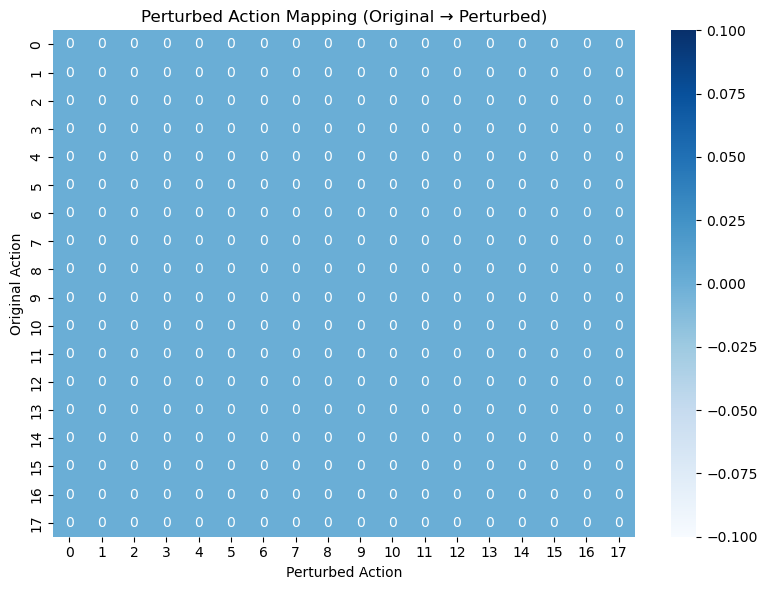

In [9]:
dataset_path = 'datasets/expert_logs/seaquest_expert_perturb0_stats.pkl'
dataset = load_dataset(dataset_path)

info = inspect_dataset(dataset)
plot_perturbation_heatmap(dataset)

In [7]:
dataset_paths = [    
    'datasets/beginner_logs/seaquest_beginner_perturb0_stats.pkl',
    'datasets/beginner_logs/seaquest_beginner_perturb5_stats.pkl',
    'datasets/beginner_logs/seaquest_beginner_perturb10_stats.pkl',
    'datasets/beginner_logs/seaquest_beginner_perturb20_stats.pkl',
]

for path in dataset_paths:
    print("="*60)
    validate_dataset(path, expected_length=150_000, expect_plotting_format=True)

⚠️  Length mismatch: expected 150000, got 155348
✅ seaquest_beginner_perturb0_stats.pkl
    Total transitions      : 155348
    Perturbed actions      : 0
    Wrong perturbations    : 0
    Diagonal (same action) : 0
    Perturbation rate      : 0.00%
✔️  Perturbation logic valid.
📊 Episode Analysis for seaquest_beginner_perturb0_stats.pkl
    ➤ Action space size    : 18
    ➤ Number of episodes   : 27
    ➤ Reward range         : 480.0 to 480.0
    ➤ Mean reward          : 480.00
    ➤ Episode Length range : 5753 to 5754
    ➤ Mean episode length  : 5753.63
    ➤ Last episode cut?    : No
    ➤ Last episode length  : N/A
⚠️  Length mismatch: expected 150000, got 156111
✅ seaquest_beginner_perturb5_stats.pkl
    Total transitions      : 156111
    Perturbed actions      : 7979
    Wrong perturbations    : 0
    Diagonal (same action) : 0
    Perturbation rate      : 5.11%
✔️  Perturbation logic valid.
📊 Episode Analysis for seaquest_beginner_perturb5_stats.pkl
    ➤ Action space size  

In [7]:
dataset_paths = [    
    'datasets/intermediate_logs/seaquest_intermediate_perturb0_stats.pkl',
    'datasets/intermediate_logs/seaquest_intermediate_perturb5_stats.pkl',
    'datasets/intermediate_logs/seaquest_intermediate_perturb10_stats.pkl',
    'datasets/intermediate_logs/seaquest_intermediate_perturb20_stats.pkl',
]

for path in dataset_paths:
    print("="*60)
    validate_dataset(path, expected_length=150000, expect_plotting_format=True)

✅ seaquest_intermediate_perturb0_stats.pkl
    Total transitions      : 150000
    Perturbed actions      : 0
    Wrong perturbations    : 0
    Diagonal (same action) : 0
    Perturbation rate      : 0.00%
✔️  Perturbation logic valid.
📊 Episode Analysis for seaquest_intermediate_perturb0_stats.pkl
    ➤ Action space size    : 18
    ➤ Number of episodes   : 27
    ➤ Reward range         : 840.0 to 940.0
    ➤ Mean reward          : 936.30
    ➤ Episode Length range : 5086 to 5574
    ➤ Mean episode length  : 5555.56
    ➤ Last episode cut?    : Yes
    ➤ Last episode length  : 5086
✅ seaquest_intermediate_perturb5_stats.pkl
    Total transitions      : 150000
    Perturbed actions      : 7652
    Wrong perturbations    : 0
    Diagonal (same action) : 0
    Perturbation rate      : 5.10%
✔️  Perturbation logic valid.
📊 Episode Analysis for seaquest_intermediate_perturb5_stats.pkl
    ➤ Action space size    : 18
    ➤ Number of episodes   : 20
    ➤ Reward range         : 540.0 to 162

In [8]:
dataset_paths = [    
    'datasets/expert_logs/seaquest_expert_perturb0_stats.pkl',
    'datasets/expert_logs/seaquest_expert_perturb5_stats.pkl',
    'datasets/expert_logs/seaquest_expert_perturb10_stats.pkl',
    'datasets/expert_logs/seaquest_expert_perturb20_stats.pkl',
]

for path in dataset_paths:
    print("="*60)
    validate_dataset(path, expected_length=150000, expect_plotting_format=True)

✅ seaquest_expert_perturb0_stats.pkl
    Total transitions      : 150000
    Perturbed actions      : 0
    Wrong perturbations    : 0
    Diagonal (same action) : 0
    Perturbation rate      : 0.00%
✔️  Perturbation logic valid.
📊 Episode Analysis for seaquest_expert_perturb0_stats.pkl
    ➤ Action space size    : 18
    ➤ Number of episodes   : 21
    ➤ Reward range         : 40.0 to 1500.0
    ➤ Mean reward          : 1430.48
    ➤ Episode Length range : 448 to 7478
    ➤ Mean episode length  : 7142.86
    ➤ Last episode cut?    : Yes
    ➤ Last episode length  : 448
✅ seaquest_expert_perturb5_stats.pkl
    Total transitions      : 150000
    Perturbed actions      : 7652
    Wrong perturbations    : 0
    Diagonal (same action) : 0
    Perturbation rate      : 5.10%
✔️  Perturbation logic valid.
📊 Episode Analysis for seaquest_expert_perturb5_stats.pkl
    ➤ Action space size    : 18
    ➤ Number of episodes   : 25
    ➤ Reward range         : 160.0 to 1700.0
    ➤ Mean reward    